In [155]:
# Importing libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [156]:
# Importing training dataset
ds=pd.read_csv("train_malignant.csv")
df=pd.DataFrame(ds)
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [164]:
# Importing training dataset
ds=pd.read_csv("test_malignant.csv")
df_test=pd.DataFrame(ds)
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [165]:
#checking for null values in training dataset
for i in df.columns:
    null=df[i].isnull().sum()
    if null>0:
        print('Number of Null Values At  '+"'"+ i+"'" ,'==  ',null )
    else:
        print('There are no null values in  '+"'"+ i+"'")

There are no null values in  'id'
There are no null values in  'comment_text'
There are no null values in  'malignant'
There are no null values in  'highly_malignant'
There are no null values in  'rude'
There are no null values in  'threat'
There are no null values in  'abuse'
There are no null values in  'loathe'


In [166]:
#checking null values in test dataset:
for i in df_test.columns:
    null=df_test[i].isnull().sum()
    if null>0:
        print('Number of null value is at '+"'"+ i+"'",'==  ',null)
    else:
        print('There are no null values in  '+"'"+ i+"'")

There are no null values in  'id'
There are no null values in  'comment_text'


In [167]:
# Importing libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

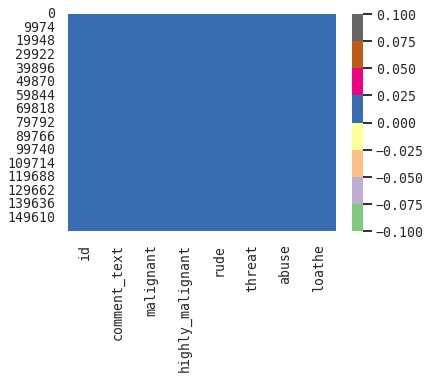

In [168]:
# heatmap for checking null values:

sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
sns.heatmap(df.isnull(),cmap='Accent')

No null values

In [169]:
# Data Cleaning:
df.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)

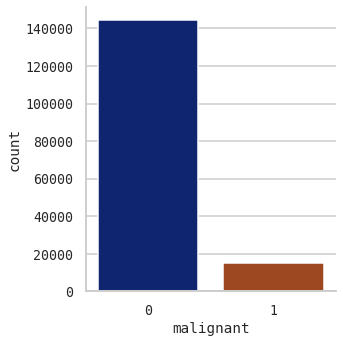

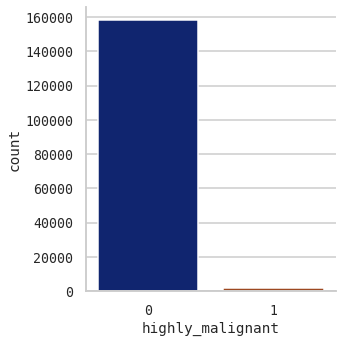

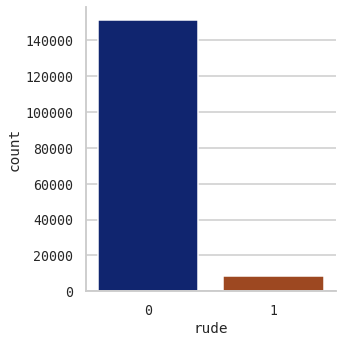

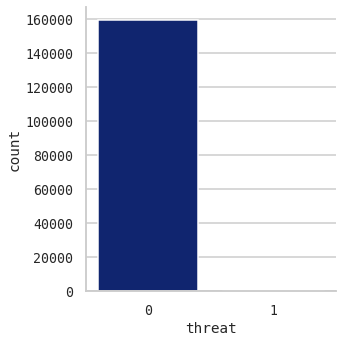

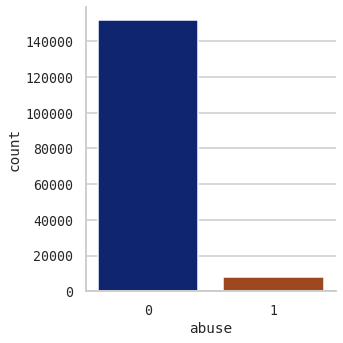

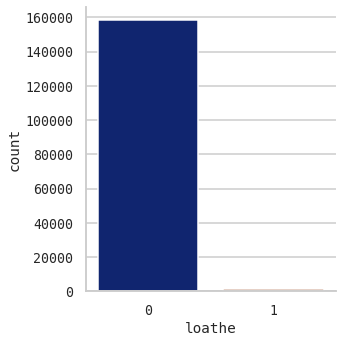

In [170]:
# printing Target columns:

labels=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in labels:
    sns.catplot(x=i,kind="count",data=df);

In [171]:
#COUNT OF DIFFERENT LABELS
x=df.iloc[:,2:-1].sum()
x

highly_malignant    1595
rude                8449
threat               478
abuse               7877
dtype: int64

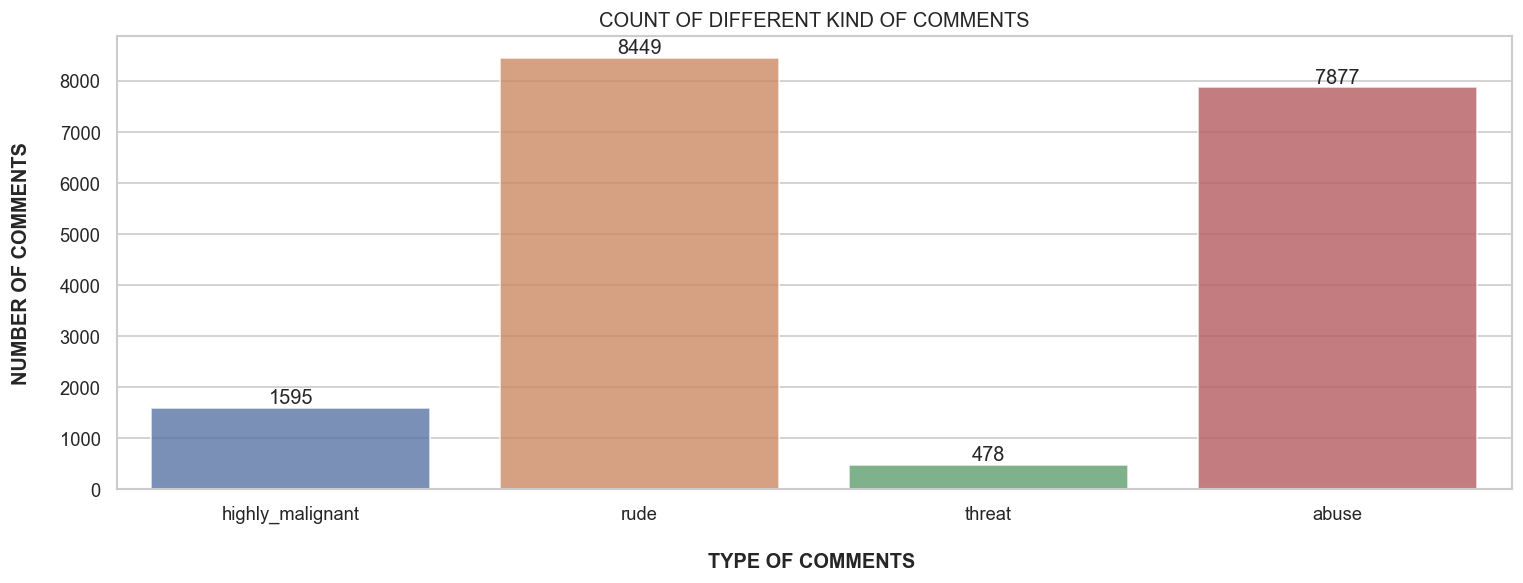

In [172]:
#COUNT OF LABELS
x=df.iloc[:,2:-1].sum() #not including comment_text and raw length column
plt.figure(figsize=(15,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("COUNT OF DIFFERENT KIND OF COMMENTS")
plt.ylabel('NUMBER OF COMMENTS\n', fontsize=12,weight='bold')
plt.xlabel('\nTYPE OF COMMENTS ', fontsize=12,weight='bold')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [173]:
#Downloading wordnet
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajbi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [174]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
import re

In [160]:
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

In [175]:
# Data Pre processing of comment_text column: Train Dataset

def get_clean(x):
    x=str(x).lower().replace('\\','').replace('_',' ')
    x=re.sub('\[.*?\]','',x)
    x=re.sub('[%s]'%re.escape(string.punctuation),'',x)
    x=re.sub('\w*\d\w*','',x)
    x=re.sub("(.)\\1{2,}","\\1",x)
    return x

In [176]:
df['comment_text']=df['comment_text'].apply(lambda x: get_clean(x))

In [177]:
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,daww he match this background colour im seemin...,0,0,0,0,0,0
2,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,more i cant make any real suggestion on impro...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [178]:
# Data Pre processing Comment_text column: Test dataset

def get_clean(x):
    x=str(x).lower().replace('\\','').replace('_',' ').replace('\n','').replace(r"[^a-zA-Z]+", " ").replace(r"—"," ").replace(r'“', ' ').replace(r'”',' ').replace('’',' ').replace(r'–',' ').replace('«', ' ').replace('»',' ').replace('®',' ').replace('´',' ').replace('·',' ').replace('½',' ').replace('¾',' ').replace('¤',' ')
    x=re.sub('\[.*?\]','',x)
    x=re.sub('[%s]'%re.escape(string.punctuation),'',x)
    x=re.sub('\w*\d\w*','',x)
    x=re.sub("(.)\\1{2,}","\\1",x)
    return x

In [179]:
df_test['comment_text']=df_test['comment_text'].apply(lambda x: get_clean(x))

In [180]:
df_test.head()

,comment_text
0,yo bitch ja rule is more succesful then youll ...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the info...
4,i dont anonymously edit articles at all


In [12]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

comment_text: ['explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired '
 'daww he match this background colour im seemingly stuck with thanks talk  january utc'
 'hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info'
 ...
 'spitzer umm there no actual article for prostitution ring  crunch captain'
 'and it look like it wa actually you who put on the speedy to have the first version deleted now that i look at it'
 ' and  i really dont think you understand i came here and my idea wa bad right away what kind of community go you have bad ideas go away instead of helping rewrite them ']
malignant: [0 1]
highly_malignant: [0 1]
rude: [

In [182]:
df['Comment_length'] = df['comment_text'].str.len()

In [183]:
# finding comment length sum:

df['Comment_length'].sum()

58218316

In [184]:
# importing wordcloud library:

!pip install wordcloud

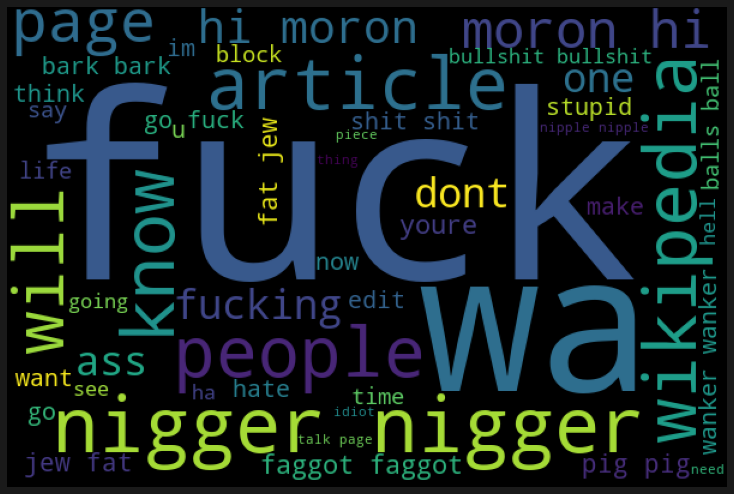

In [185]:
# Malignant column:

from wordcloud import WordCloud
words = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
 

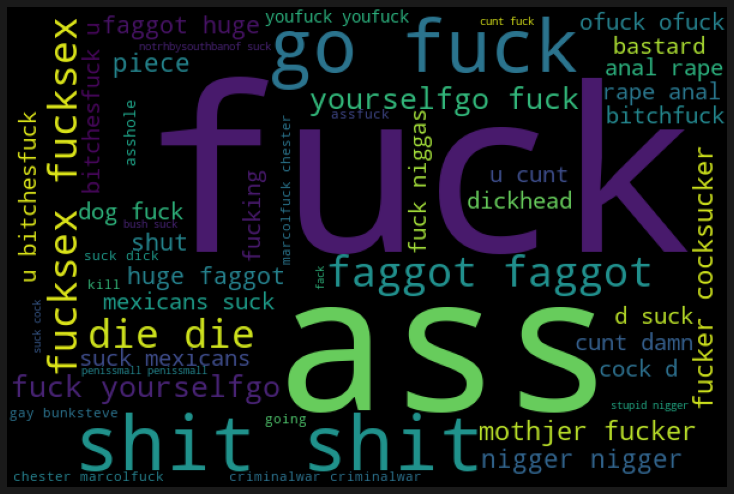

In [186]:
# highly_malignant column:

from wordcloud import WordCloud
words = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

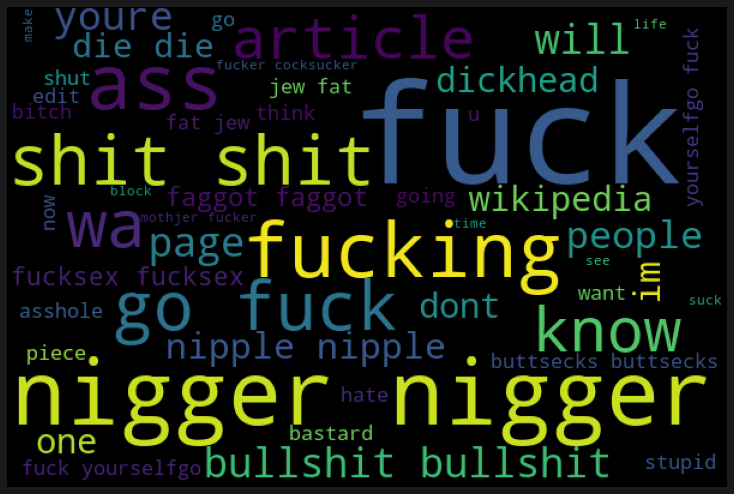

In [187]:
# rude column:

words=df['comment_text'][df['rude']==1]
spam_cloud=WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

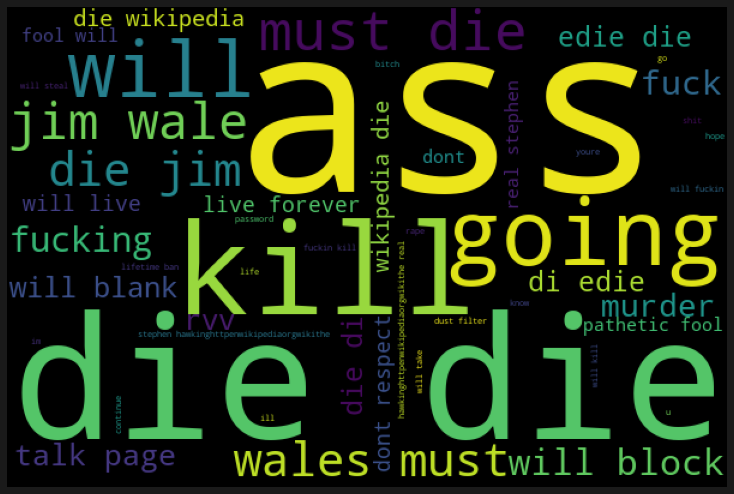

In [188]:
# threat column:

from wordcloud import WordCloud
words = df['comment_text'][df['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

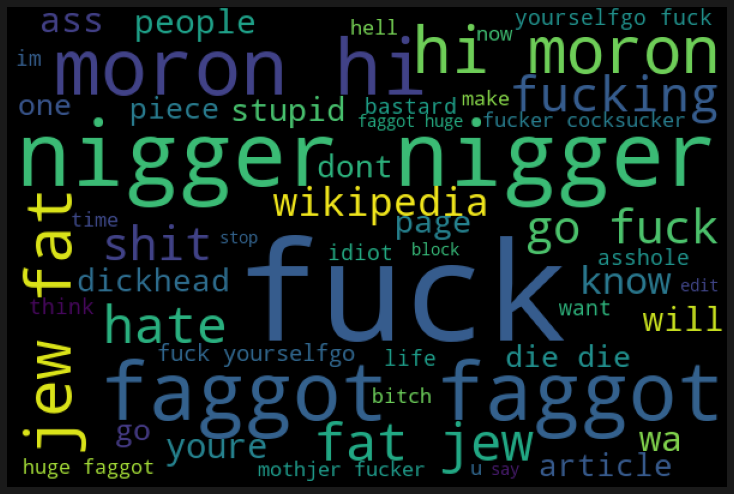

In [189]:
# abuse column:

from wordcloud import WordCloud
words = df['comment_text'][df['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

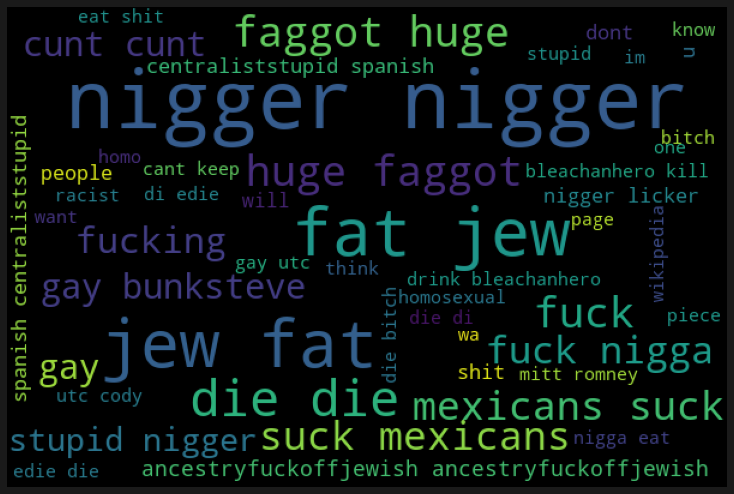

In [190]:
# loathe column:

from wordcloud import WordCloud
words = df['comment_text'][df['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Modelling :

In [191]:
# Importing libraries:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,auc,roc_curve,roc_auc_score,log_loss,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


<AxesSubplot:title={'center':'Label distribution over comments'}, ylabel='count'>

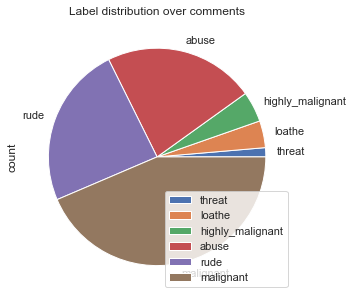

In [192]:
# plotting pie chart of target columns:

target_columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
distribution = df[target_columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5))

In [193]:
# Assigning target columns as Comment and it contains 0 and 1

target_data = df[target_columns]
df['Comment'] =df[target_columns].sum(axis =1)
print(df['Comment'].value_counts())
df['Comment'] = df['Comment'] > 0 
df['Comment'] = df['Comment'].astype(int)
print(df['Comment'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: Comment, dtype: int64
0    143346
1     16225
Name: Comment, dtype: int64


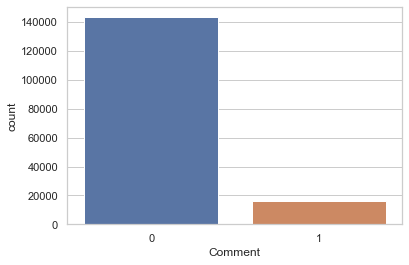

In [194]:
#Plotting a countplot
sns.countplot(x="Comment" , data = df)
plt.show()

In [195]:
# word to vector for feature column which is comment_text and its valued 'x,:

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
feature = tf_vec.fit_transform(df['comment_text'])
x = feature

In [196]:
# target column: 'y'

y=df['Comment']

In [197]:
# train test split:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)

# Logistic Regression:

In [29]:
lg = LogisticRegression()

lg.fit(train_x, train_y)

y_pred_train = lg.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, y_pred_train)))

y_pred_test = lg.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,y_pred_test)))

print(confusion_matrix(test_y,y_pred_test))
print(classification_report(test_y,y_pred_test))

Training accuracy is 0.958522457676434
Test accuracy is 0.9545036764705882
[[42769   215]
 [ 1963  2925]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42984
           1       0.93      0.60      0.73      4888

    accuracy                           0.95     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [30]:
cvs=cross_val_score(lg, x, y, cv=9, scoring='accuracy').mean()
mse=mean_squared_error(test_y,y_pred_test)
rmse=np.sqrt(mse)
conf=confusion_matrix(test_y,y_pred_test)
log = log_loss(test_y,y_pred_test)
auc_scr=roc_auc_score(test_y,y_pred_test)
tpr,fpr,threshold=roc_curve(test_y,y_pred_test)

print('cross validation score :',cvs*100)
print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
print('\nLOG_LOSS:',log)
print('\nAUC_ROC Score:\n',auc_scr)
print('\nTPR:',tpr,'\nFPR:',fpr)

cross validation score : 95.58064914934609

MEAN SQUARED ERROR:
 0.04549632352941176

ROOT MEAN SQ. ERROR:
 0.2132986721229454

LOG_LOSS: 1.5713909362793073

AUC_ROC Score:
 0.7967011970807544

TPR: [0.         0.00500186 1.        ] 
FPR: [0.         0.59840426 1.        ]


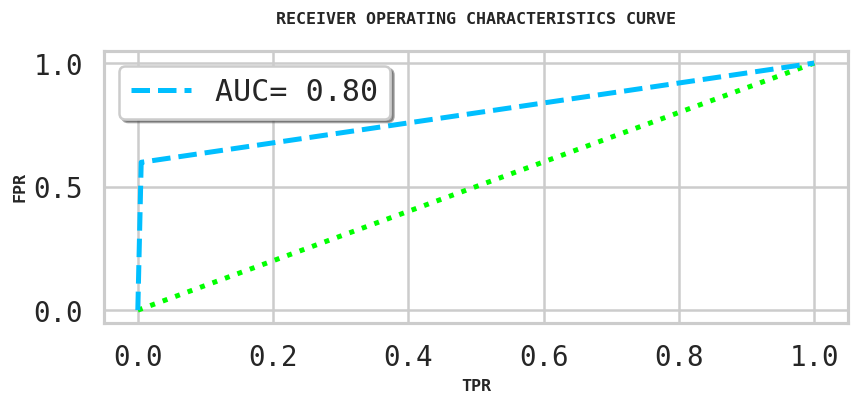

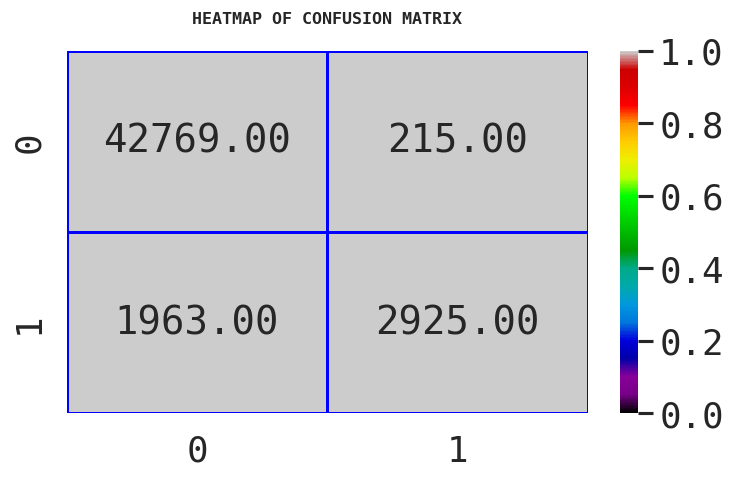

In [31]:
#plotting the auc_roc curve
#print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(8,3),dpi=120)
plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
plt.xlabel("TPR",weight='bold',fontsize=10)
plt.ylabel('FPR',weight='bold',fontsize=10)
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

#plotting confusion matrix
#print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(7,4),dpi=120)
sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')
    

# XGBOOST:

In [35]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(train_x,train_y)

predxg_train = xgb.predict(train_x)
print('Training accuracy is {}'.format(accuracy_score(train_y, predxg_train)))

predxg_test = xgb.predict(test_x)
print('Test accuracy is {}'.format(accuracy_score(test_y,predxg_test)))

print(confusion_matrix(test_y,predxg_test))
print(classification_report(test_y,predxg_test))

[10:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9610202419001065
Test accuracy is 0.9529787767379679
[[42741   243]
 [ 2008  2880]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42984
           1       0.92      0.59      0.72      4888

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [36]:
cvs=cross_val_score(xgb, x, y, cv=9, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

[10:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [37]:
mse=mean_squared_error(test_y,predxg_test)
rmse=np.sqrt(mse)
conf=confusion_matrix(test_y,predxg_test)
log = log_loss(test_y,predxg_test)
auc_scr=roc_auc_score(test_y,predxg_test)
tpr,fpr,threshold=roc_curve(test_y,predxg_test)


print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
print('\nLOG_LOSS:',log)
print('\nAUC_ROC Score:\n',auc_scr)
print('\nTPR:',tpr,'\nFPR:',fpr)


MEAN SQUARED ERROR:
 0.047021223262032084

ROOT MEAN SQ. ERROR:
 0.21684377616623468

LOG_LOSS: 1.6240595748479179

AUC_ROC Score:
 0.7917723848374442

TPR: [0.         0.00565327 1.        ] 
FPR: [0.         0.58919804 1.        ]


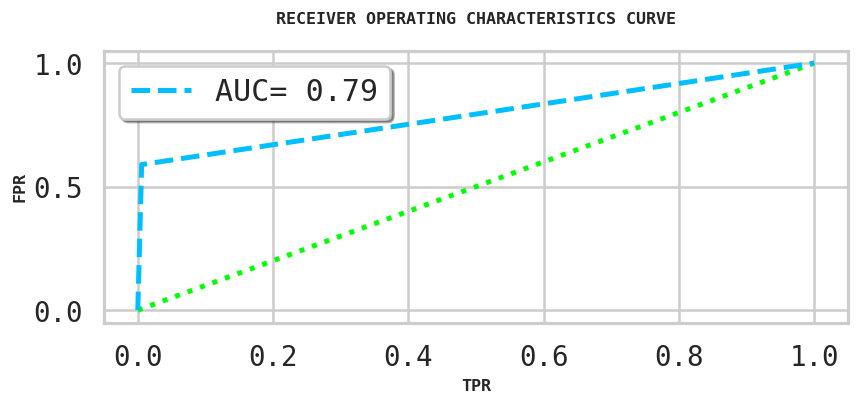

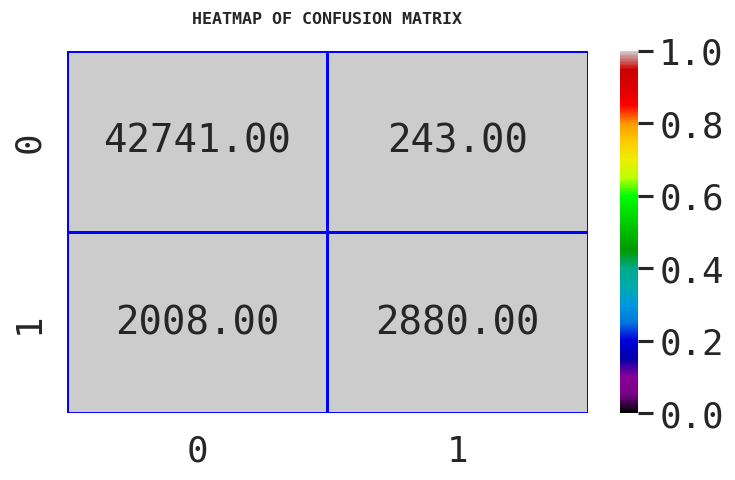

In [38]:
#plotting the auc_roc curve
#print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(8,3),dpi=120)
plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
plt.xlabel("TPR",weight='bold',fontsize=10)
plt.ylabel('FPR',weight='bold',fontsize=10)
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

#plotting confusion matrix
#print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(7,4),dpi=120)
sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')
    

# Random Forest Classifier

In [58]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': [5, 10, None]}]

clf = GridSearchCV(rf, forest_params,scoring='f1_weighted',cv =9, n_jobs = -1, verbose = 3,refit = False)

clf.fit(train_x,train_y)
    
print(clf.best_params_)

Fitting 9 folds for each of 3 candidates, totalling 27 fits
{'max_depth': None}


In [59]:
#using best parameters:
rf= RandomForestClassifier(max_depth=None)
rf.fit(train_x,train_y)
rf.score(train_x,train_y)

0.9986391999928379

In [60]:
#finding cross val score

rfscore = cross_val_score(rf,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score: 95.6082238556021


In [61]:
#Predicting value
pred_rfc = rf.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred_rfc)
confusion=confusion_matrix(test_y,pred_rfc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.9553601270053476
Confusion Matrix:  [[42503   481]
 [ 1656  3232]]


In [62]:
mse=mean_squared_error(test_y,pred_rfc)
rmse=np.sqrt(mse)
conf=confusion_matrix(test_y,pred_rfc)
log = log_loss(test_y,pred_rfc)
auc_scr=roc_auc_score(test_y,pred_rfc)
tpr,fpr,threshold=roc_curve(test_y,pred_rfc)

print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
print('\nLOG_LOSS:',log)
print('\nAUC_ROC Score:\n',auc_scr)
print('\nTPR:',tpr,'\nFPR:',fpr)


MEAN SQUARED ERROR:
 0.044639872994652406

ROOT MEAN SQ. ERROR:
 0.2112815017805686

LOG_LOSS: 1.5418146257162448

AUC_ROC Score:
 0.8250104594927112

TPR: [0.         0.01119021 1.        ] 
FPR: [0.         0.66121113 1.        ]


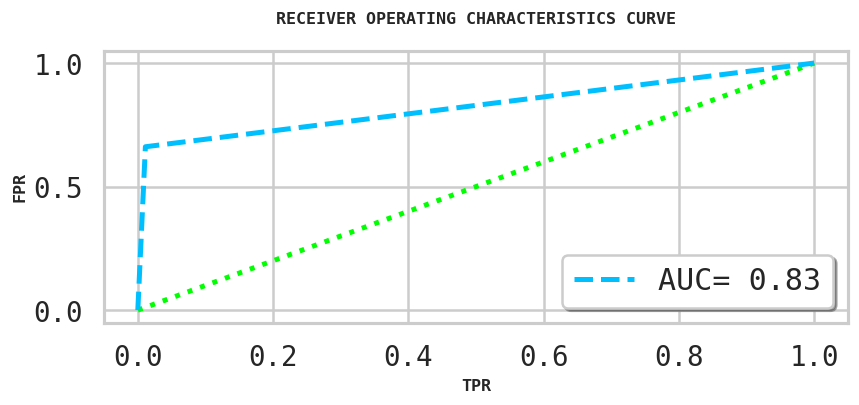

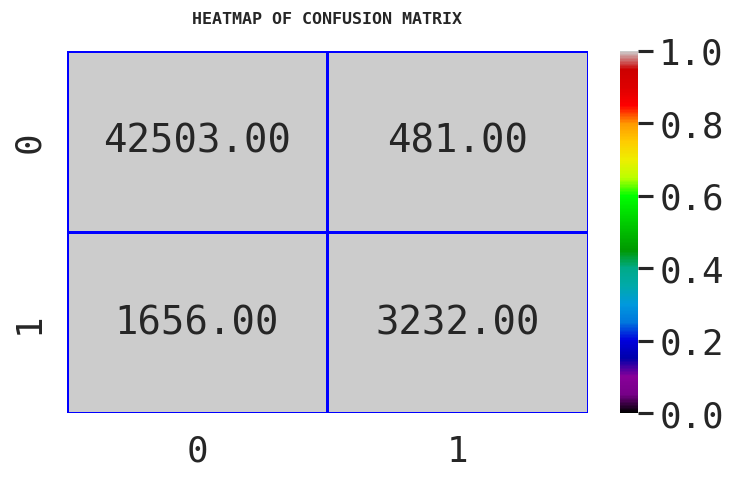

In [63]:
#plotting the auc_roc curve
#print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(8,3),dpi=120)
plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
plt.xlabel("TPR",weight='bold',fontsize=10)
plt.ylabel('FPR',weight='bold',fontsize=10)
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

#plotting confusion matrix
#print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(7,4),dpi=120)
sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

# AdaBoost:

In [64]:
from sklearn.model_selection import GridSearchCV
ada_params = {'learning_rate':np.arange(0.05,0.2),
          'n_estimators':[10,200,10],
         }
grid = GridSearchCV(estimator = ada,param_grid = ada_params,cv=5,n_jobs=-1)
grid.fit(train_x,train_y)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'learning_rate': 0.05, 'n_estimators': 200}


In [65]:
#using best parameters:
ada= AdaBoostClassifier(n_estimators=200,learning_rate=0.05)
ada.fit(train_x,train_y)
ada.score(train_x,train_y)

0.923911583810061

In [66]:
#Predicting value
pred_ada = ada.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred_ada)
confusion=confusion_matrix(test_y,pred_ada)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.9225852272727273
Confusion Matrix:  [[42969    15]
 [ 3691  1197]]


In [67]:
mse=mean_squared_error(test_y,pred_ada)
rmse=np.sqrt(mse)
conf=confusion_matrix(test_y,pred_ada)
log = log_loss(test_y,pred_ada)
auc_scr=roc_auc_score(test_y,pred_ada)
tpr,fpr,threshold=roc_curve(test_y,pred_ada)

print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
print('\nLOG_LOSS:',log)
print('\nAUC_ROC Score:\n',auc_scr)
print('\nTPR:',tpr,'\nFPR:',fpr)


MEAN SQUARED ERROR:
 0.07741477272727272

ROOT MEAN SQ. ERROR:
 0.27823510333398394

LOG_LOSS: 2.673811775432413

AUC_ROC Score:
 0.6222682333288555

TPR: [0.00000000e+00 3.48967058e-04 1.00000000e+00] 
FPR: [0.         0.24488543 1.        ]


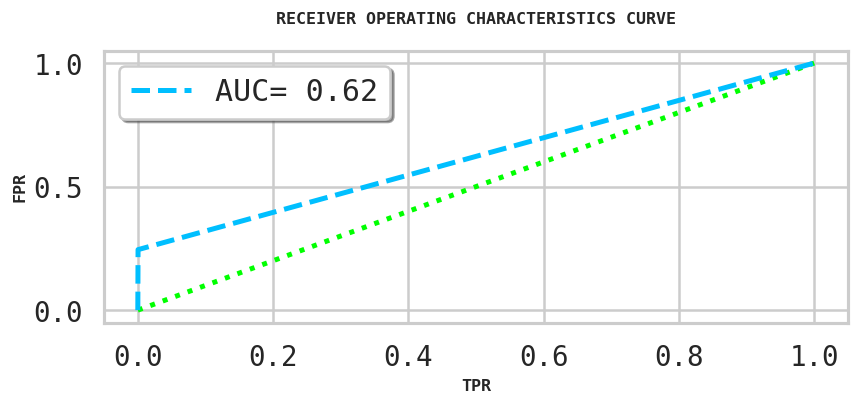

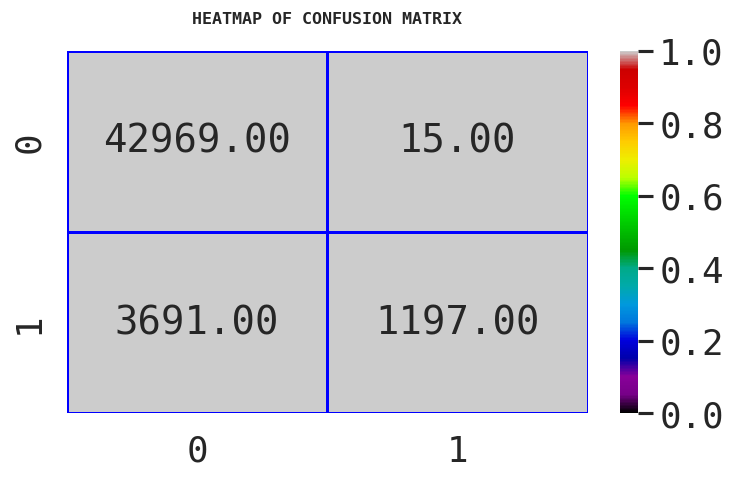

In [68]:
#plotting the auc_roc curve
#print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(8,3),dpi=120)
plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
plt.xlabel("TPR",weight='bold',fontsize=10)
plt.ylabel('FPR',weight='bold',fontsize=10)
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

#plotting confusion matrix
#print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(7,4),dpi=120)
sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

# KNeighbors Classifier

In [69]:
#Using GridsearchCV on KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

knc=KNeighborsClassifier()

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree']
              }

clf = GridSearchCV(knc, parameters, cv=9, scoring='accuracy',verbose=2)

clf.fit(train_x,train_y)
    
print(clf.best_params_)

Fitting 9 folds for each of 40 candidates, totalling 360 fits
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  21.4s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  21.0s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.9s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.7s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.3s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.6s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.3s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.4s
[CV] END .....algorithm=auto, n_neighbors=0, weights=uniform; total time=  20.5s
[CV] END ....algorithm=auto, n_neighbors=0, weights=distance; total time=  20.3s
[CV] END ....algorithm=auto, n_neighbors=0, weights=distance; total time=  20.5s
[CV] END ....algorithm=auto, n_neighbors=0, wei

[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.9s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.8s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  29.1s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.8s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.9s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.8s
[CV] END ....algorithm=auto, n_neighbors=5, weights=distance; total time=  28.9s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  29.6s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  29.0s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  28.8s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  28.9s
[CV] END .....algorithm=auto, n_neighbors=6, weights=uniform; total time=  29.3s
[CV] END .....algorithm=auto

[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=  21.0s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=  20.8s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=  21.1s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=uniform; total time=  20.9s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.8s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  21.0s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.8s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.8s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.7s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.7s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.9s
[CV] END algorithm=ball_tree, n_neighbors=1, weights=distance; total time=  20.7s
[CV] END algorithm=b

[CV] END algorithm=ball_tree, n_neighbors=6, weights=distance; total time=  33.3s
[CV] END algorithm=ball_tree, n_neighbors=6, weights=distance; total time=  32.7s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.1s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.0s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  32.4s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.2s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=uniform; total time=  33.3s
[CV] END algorithm=ball_tree, n_neighbors=7, weights=distance; total time=  32.7s
[CV] END algorithm=ball_t

In [70]:
#using best parameters on KNeighborsClassifier
knc= KNeighborsClassifier(algorithm='auto',n_neighbors=3,weights='distance')
knc.fit(train_x,train_y)
knc.score(train_x,train_y)

0.9986481526244639

In [71]:
#Predicting value
pred_knc = knc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred_knc)
confusion=confusion_matrix(test_y,pred_knc)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.9229821189839572
Confusion Matrix:  [[42669   315]
 [ 3372  1516]]


In [72]:
mse=mean_squared_error(test_y,pred_knc)
rmse=np.sqrt(mse)
conf=confusion_matrix(test_y,pred_knc)
log = log_loss(test_y,pred_knc)
auc_scr=roc_auc_score(test_y,pred_knc)
tpr,fpr,threshold=roc_curve(test_y,pred_knc)

print('\nMEAN SQUARED ERROR:\n',mse)
print('\nROOT MEAN SQ. ERROR:\n',rmse)
print('\nLOG_LOSS:',log)
print('\nAUC_ROC Score:\n',auc_scr)
print('\nTPR:',tpr,'\nFPR:',fpr)


MEAN SQUARED ERROR:
 0.07701788101604277

ROOT MEAN SQ. ERROR:
 0.27752095599439475

LOG_LOSS: 2.6601086322114433

AUC_ROC Score:
 0.6514094956506483

TPR: [0.         0.00732831 1.        ] 
FPR: [0.        0.3101473 1.       ]


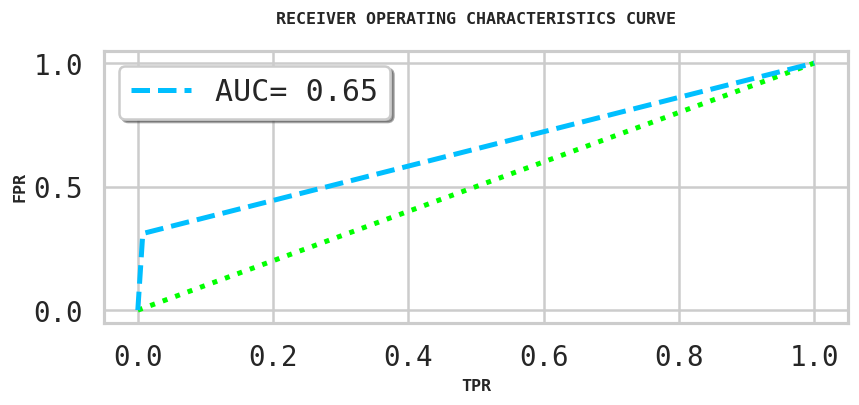

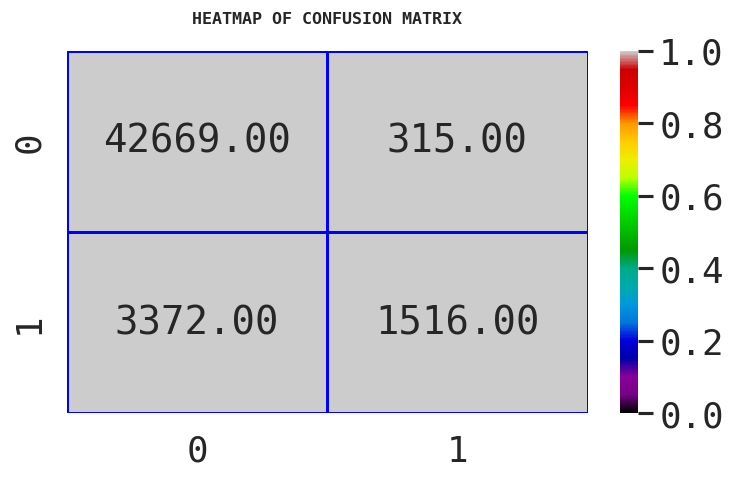

In [73]:
#plotting the auc_roc curve
#print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.figure(figsize=(8,3),dpi=120)
plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
plt.xlabel("TPR",weight='bold',fontsize=10)
plt.ylabel('FPR',weight='bold',fontsize=10)
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')

#plotting confusion matrix
#print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(7,4),dpi=120)
sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
plt.show()
print('\n')
    

## Best Model is Random Forest Classifier as its log loss is lowest and also the difference between accuracy and cross validation is less.

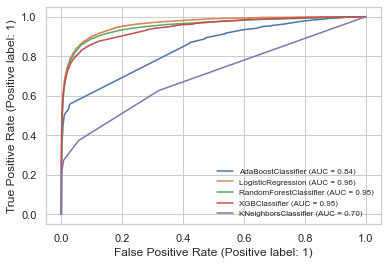

In [198]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(ada,test_x,test_y)
plot_roc_curve(lg,test_x,test_y,ax=disp.ax_)
plot_roc_curve(rf,test_x,test_y,ax=disp.ax_)
plot_roc_curve(xgb,test_x,test_y,ax=disp.ax_)
plot_roc_curve(knn,test_x,test_y,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right',frameon=False)
plt.show()


In [135]:
import joblib

In [133]:
# converting word to vector : Testing dataset

test_data =tf_vec.fit_transform(df_test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2812116 stored elements in Compressed Sparse Row format>

In [134]:
test_data.shape

(153164, 10000)

In [136]:
# saving the model:

joblib.dump(rf,'Malignant_comment.pkl')

['Malignant_comment.pkl']

In [137]:
#loading the model:

model=joblib.load('Malignant_comment.pkl')

In [138]:
# Predicting output for testing dataset:

result=model.predict(test_data)

In [139]:
display(result)

array([0, 0, 0, ..., 0, 0, 1])

In [140]:
# converting ndarray to dataframe
Output1=pd.DataFrame(result)

In [141]:
Output1

,0
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [145]:
# Concating Predicted output with test dataset:

df_test=pd.concat([df_test,Output1], axis = 1)

In [152]:
#changed column name 0 to Output:

df_test.columns =['comment_text', 'Output']

In [153]:
df_test

,comment_text,Output
0,yo bitch ja rule is more succesful then youll ...,0
1,from rfc the title is fine as it is imo,0
2,sources zawe ashton on lapland,0
3,if you have a look back at the source the info...,0
4,i dont anonymously edit articles at all,0
...,...,...
153159,i totally agree this stuff is nothing but to...,0
153160,throw from out field to home plate does it ge...,0
153161,okinotorishima categories i see your changes ...,0
153162,one of the founding nations of the eu german...,0


In [154]:
# dataFrame to Malignant_test_data CSV file

df_test.to_csv("C:\\Users\\rajbi\\OneDrive\\Desktop\\Malignant_test_data.csv")